# Neural Network Simple Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
X = np.stack([[-0.5,0.5,-0.5,0.5],[-0.5,-0.5,0.5,0.5]],axis=1)
y = np.expand_dims(np.array([-0.5,0.5,0.5,-0.5]),-1)
X.shape, y.shape

((4, 2), (4, 1))

In [3]:
input_size = X.shape[1] 
num_examples = X.shape[0] 
hiddenlayer_size = 2 
output_size = y.shape[1] 
epoch=5000 
lr=0.1
print("Number of features in data set: {}".format(input_size))
print("Number of examples in data set: {}".format(num_examples))
print("Number of hidden layers neurons: {}".format(hiddenlayer_size))
print("Number of neurons at output layer: {}".format(output_size))
print("Number training iterations: {}".format(epoch))
print("Learning rate: {}".format(lr))

Number of features in data set: 2
Number of examples in data set: 4
Number of hidden layers neurons: 2
Number of neurons at output layer: 1
Number training iterations: 5000
Learning rate: 0.1


In [4]:
def initialize_parameters(layer_dims=[X.shape[1],hiddenlayer_size,output_size]):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l-1],layer_dims[l])
                    bl -- bias vector of shape (1, layer_dims[l])
    """
    
    np.random.seed(4)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
      
        parameters['W' + str(l)] = np.random.random([layer_dims[l-1],layer_dims[l]])-0.5
        parameters['b' + str(l)] = np.random.random((1,layer_dims[l]))-0.5

        
    return parameters

Testing function

In [5]:
parameters = initialize_parameters()
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.46702984  0.04723225]
 [ 0.47268436  0.21481599]]
b1 = [[ 0.19772882 -0.2839105 ]]
W2 = [[ 0.47627445]
 [-0.49376974]]
b2 = [[-0.24701764]]


In [6]:
# Mean Square erro function
def mse(y,pred):
    return np.sum((y-pred)**2)/(num_examples)

In [7]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = np.dot(X,W1)+b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,W2)+b2
    # Calculating the loss
    data_loss = mse(y,z2)

    return data_loss

In [8]:
#def tanh(x):
 #   return 2/(1+np.exp(-2*x))-1

In [9]:
def build_model(nn_hdim, max_iter=1000, converge=0.05, lr=lr, beta=None):
    """
     This function learns parameters for the neural network with 1 hidden layer and returns the model.
     - nn_hdim: Number of nodes in the hidden layer
     - max_iter: Number of maximum iteration
     - converge: Convergence is reached when your average MSE for the whole dataset is less than 'converge'
     - lr: learning rate
     - 
    """
     
    # Initialize the parameters to random values. We need to learn these.
    parameters = initialize_parameters(layer_dims=[X.shape[1],nn_hdim,output_size])
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
     
    # This is what we return at the end
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    #initialize
    i = 0
    costs =[]
    if beta != None:
        VdW1 = np.zeros((W1.shape))
        Vdb1 = np.zeros((b1.shape))
        VdW2 = np.zeros((W2.shape))
        Vdb2 = np.zeros((b2.shape))
        
    # Gradient descent. 
    while calculate_loss(model) > converge and i < max_iter:
        i += 1
 
        # Forward propagation
        z1 = np.dot(X,W1)+b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,W2)+b2

        # Backpropagation
        dz2 = 2*(z2-y)
        dW2 = np.dot(a1.T,dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        # tanh' = 1-(tanh)**2
        dz1 = np.dot(dz2,W2.T)*(1 - (np.tanh(z1))**2)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0)
 
 
        # Gradient descent parameter update
        if beta == None:
            W1 += -lr * dW1
            b1 += -lr * db1
            W2 += -lr * dW2
            b2 += -lr * db2
            
        else:
            VdW1 = beta*VdW1+(1-beta)*dW1
            Vdb1 = beta*Vdb1+(1-beta)*db1
            VdW2 = beta*VdW2+(1-beta)*dW2
            Vdb2 = beta*Vdb2+(1-beta)*db2
            
            W1 += -lr * VdW1
            b1 += -lr * Vdb1
            W2 += -lr * VdW2
            b2 += -lr * Vdb2
            
        #updates = [(param, param-eta*grad +momentum_constant*vel) for param, grad, vel in zip(self.params, grads, velocities)]  
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
        costs.append(calculate_loss(model))
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        #if print_loss and i % 1000 == 0:
         # print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(lr))
    plt.show()
     
    return model



## NN with 2 hidden units

Loss after iteration 1: 0.248288
Loss after iteration 2: 0.245790
Loss after iteration 3: 0.243766
Loss after iteration 4: 0.242040
Loss after iteration 5: 0.240517
Loss after iteration 6: 0.239128
Loss after iteration 7: 0.237824
Loss after iteration 8: 0.236565
Loss after iteration 9: 0.235321
Loss after iteration 10: 0.234067
Loss after iteration 11: 0.232783
Loss after iteration 12: 0.231450
Loss after iteration 13: 0.230053
Loss after iteration 14: 0.228576
Loss after iteration 15: 0.227006
Loss after iteration 16: 0.225328
Loss after iteration 17: 0.223531
Loss after iteration 18: 0.221600
Loss after iteration 19: 0.219522
Loss after iteration 20: 0.217284
Loss after iteration 21: 0.214873
Loss after iteration 22: 0.212275
Loss after iteration 23: 0.209474
Loss after iteration 24: 0.206458
Loss after iteration 25: 0.203211
Loss after iteration 26: 0.199721
Loss after iteration 27: 0.195973
Loss after iteration 28: 0.191954
Loss after iteration 29: 0.187654
Loss after iteration 30

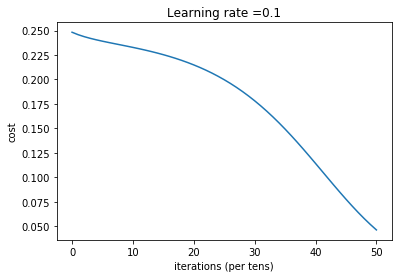

In [10]:
param = build_model(2)

## NN with 4 hidden units

Loss after iteration 1: 0.280649
Loss after iteration 2: 0.256530
Loss after iteration 3: 0.255605
Loss after iteration 4: 0.254974
Loss after iteration 5: 0.254458
Loss after iteration 6: 0.254028
Loss after iteration 7: 0.253662
Loss after iteration 8: 0.253344
Loss after iteration 9: 0.253064
Loss after iteration 10: 0.252814
Loss after iteration 11: 0.252588
Loss after iteration 12: 0.252381
Loss after iteration 13: 0.252190
Loss after iteration 14: 0.252013
Loss after iteration 15: 0.251847
Loss after iteration 16: 0.251691
Loss after iteration 17: 0.251543
Loss after iteration 18: 0.251402
Loss after iteration 19: 0.251268
Loss after iteration 20: 0.251139
Loss after iteration 21: 0.251015
Loss after iteration 22: 0.250895
Loss after iteration 23: 0.250778
Loss after iteration 24: 0.250665
Loss after iteration 25: 0.250554
Loss after iteration 26: 0.250446
Loss after iteration 27: 0.250340
Loss after iteration 28: 0.250235
Loss after iteration 29: 0.250131
Loss after iteration 30

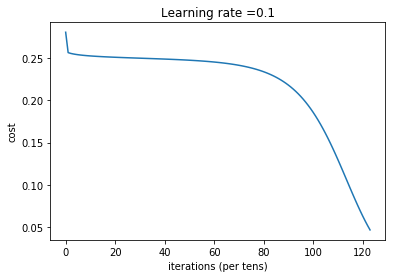

In [11]:
param = build_model(4)

## NN with 6 hidden units

Loss after iteration 1: 0.373779
Loss after iteration 2: 0.317284
Loss after iteration 3: 0.284679
Loss after iteration 4: 0.270212
Loss after iteration 5: 0.263184
Loss after iteration 6: 0.259595
Loss after iteration 7: 0.257412
Loss after iteration 8: 0.255888
Loss after iteration 9: 0.254695
Loss after iteration 10: 0.253692
Loss after iteration 11: 0.252805
Loss after iteration 12: 0.251994
Loss after iteration 13: 0.251233
Loss after iteration 14: 0.250506
Loss after iteration 15: 0.249799
Loss after iteration 16: 0.249103
Loss after iteration 17: 0.248412
Loss after iteration 18: 0.247718
Loss after iteration 19: 0.247018
Loss after iteration 20: 0.246305
Loss after iteration 21: 0.245576
Loss after iteration 22: 0.244827
Loss after iteration 23: 0.244052
Loss after iteration 24: 0.243249
Loss after iteration 25: 0.242412
Loss after iteration 26: 0.241537
Loss after iteration 27: 0.240620
Loss after iteration 28: 0.239655
Loss after iteration 29: 0.238638
Loss after iteration 30

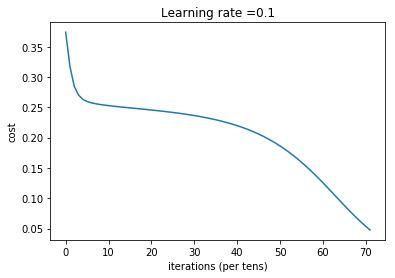

In [12]:
param = build_model(6)

# Momentum 

## NN with momentum and 2 hidden units

Loss after iteration 1: 0.248550
Loss after iteration 2: 0.246033
Loss after iteration 3: 0.243944
Loss after iteration 4: 0.242188
Loss after iteration 5: 0.240649
Loss after iteration 6: 0.239256
Loss after iteration 7: 0.237954
Loss after iteration 8: 0.236702
Loss after iteration 9: 0.235470
Loss after iteration 10: 0.234232
Loss after iteration 11: 0.232965
Loss after iteration 12: 0.231653
Loss after iteration 13: 0.230278
Loss after iteration 14: 0.228827
Loss after iteration 15: 0.227284
Loss after iteration 16: 0.225637
Loss after iteration 17: 0.223873
Loss after iteration 18: 0.221979
Loss after iteration 19: 0.219941
Loss after iteration 20: 0.217748
Loss after iteration 21: 0.215384
Loss after iteration 22: 0.212838
Loss after iteration 23: 0.210094
Loss after iteration 24: 0.207139
Loss after iteration 25: 0.203959
Loss after iteration 26: 0.200539
Loss after iteration 27: 0.196867
Loss after iteration 28: 0.192929
Loss after iteration 29: 0.188714
Loss after iteration 30

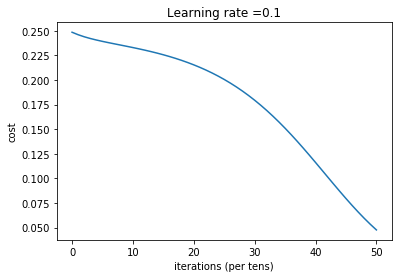

In [13]:
param = build_model(2, beta=0.1)

## NN with momentum and 4 hidden units

Loss after iteration 1: 0.263418
Loss after iteration 2: 0.262182
Loss after iteration 3: 0.255713
Loss after iteration 4: 0.255091
Loss after iteration 5: 0.254517
Loss after iteration 6: 0.254076
Loss after iteration 7: 0.253703
Loss after iteration 8: 0.253381
Loss after iteration 9: 0.253098
Loss after iteration 10: 0.252845
Loss after iteration 11: 0.252616
Loss after iteration 12: 0.252407
Loss after iteration 13: 0.252214
Loss after iteration 14: 0.252035
Loss after iteration 15: 0.251868
Loss after iteration 16: 0.251710
Loss after iteration 17: 0.251561
Loss after iteration 18: 0.251418
Loss after iteration 19: 0.251283
Loss after iteration 20: 0.251153
Loss after iteration 21: 0.251027
Loss after iteration 22: 0.250906
Loss after iteration 23: 0.250789
Loss after iteration 24: 0.250675
Loss after iteration 25: 0.250563
Loss after iteration 26: 0.250454
Loss after iteration 27: 0.250347
Loss after iteration 28: 0.250242
Loss after iteration 29: 0.250138
Loss after iteration 30

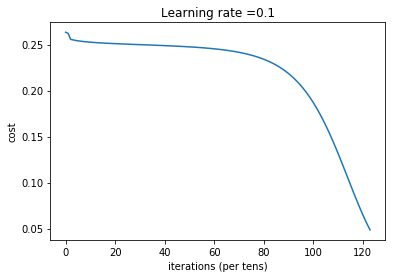

In [14]:
param = build_model(4, beta=0.1)

## NN with momentum and 6 hidden units

Loss after iteration 1: 0.343001
Loss after iteration 2: 0.282156
Loss after iteration 3: 0.270128
Loss after iteration 4: 0.265054
Loss after iteration 5: 0.261631
Loss after iteration 6: 0.259214
Loss after iteration 7: 0.257406
Loss after iteration 8: 0.255980
Loss after iteration 9: 0.254800
Loss after iteration 10: 0.253783
Loss after iteration 11: 0.252875
Loss after iteration 12: 0.252040
Loss after iteration 13: 0.251254
Loss after iteration 14: 0.250501
Loss after iteration 15: 0.249766
Loss after iteration 16: 0.249042
Loss after iteration 17: 0.248322
Loss after iteration 18: 0.247597
Loss after iteration 19: 0.246865
Loss after iteration 20: 0.246119
Loss after iteration 21: 0.245355
Loss after iteration 22: 0.244568
Loss after iteration 23: 0.243755
Loss after iteration 24: 0.242911
Loss after iteration 25: 0.242031
Loss after iteration 26: 0.241110
Loss after iteration 27: 0.240143
Loss after iteration 28: 0.239126
Loss after iteration 29: 0.238052
Loss after iteration 30

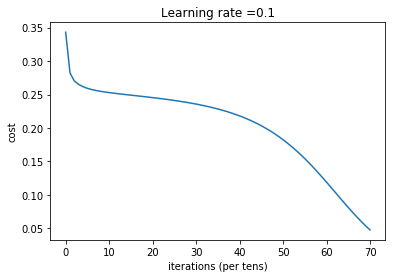

In [15]:
param = build_model(6, beta=0.1)